## Pillow Basics and usage guide
This Notebook contains the basics of pillow from loading an image to manipulating the images.

Most of the content is influenced and some times copied from pillow original reference which is available [here](https://pillow.readthedocs.io/en/stable/).

Here are some contents:
1. [Installation](#installation)
2. [PIL vs Pillow](#pilvspillow)
3. [Python Support](#pythonsupport)
4. [Basics](#basics)  
   1. [Opening an Image](#openimage)
   2. [Image Properties](imageproperties)
   3. [Saving an Image](#saveimage)
   4. [Crop, Paste and Merge](#croppastemerge)
   5. [Geomterical Transformations](#geotransforms)
   6. [Color Transforms](#colortransforms)
5. [Advanced](#advanced)
   1. [Image Filter](#filter)
   2. [Point Operations](#point)
   3. [Enhancement](#enhancement)
   4. [Image Sequences](#imagesequences)
   5. [PostScript Printing](#postscript)
   6. [More on Reading Images](#readimage)

---

### <a id='installation'>Installation</a>

In [1]:
# To install pillow latest version uncomment the following command and run the cell
# %pip install pillow
# To install the pillow specific version uncomment the following command and replace 'x' with the version number 
# %pip install pillow==x.x.x (we can use other syntaxes like >= 9.0 which installs the latest version after 9.0 )
# if you want to upgrade the existing version of pillow, uncomment the below code and run the cell
# %pip install --upgrade pillow

In [2]:
# to test the installed version of pillow run the following cell
import PIL
print(f"Pillow Library Version: {PIL.__version__}")

Pillow Library Version: 9.2.0


### <a id='pilvspillow'>PIL vs Pillow (PIL Fork)</a>


- Pillow is forked version of PIL (Python Imaging Library) which doesn't have any updates since the release 1.1.7 (2009) but not terminated.
- Support for Python Imaging Library got discontinued in 2011, but a project named pillow forked the original PIL project and added Python3.x support to it. Pillow was announced as a replacement for PIL for future usage. 
- Pillow supports a large number of image file formats including BMP, PNG, JPEG, and TIFF.

**Pillow and PIL cannot co-exist in the same environment. before installing Pillow, we need to uninstall PIL**

### <a id='pythonsupport'>Python Support</a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

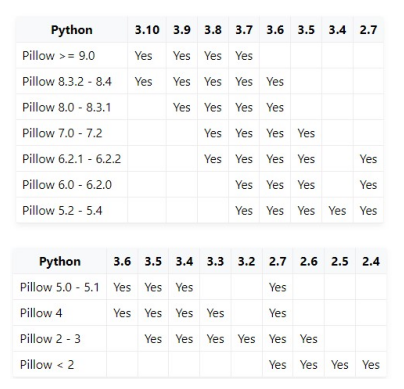

In [29]:
# Pillow supports following Python Versions:  
support_im = Image.open("./Pillow-Python-Support.jpg")
plt.imshow(support_im)
plt.axis('off')
plt.show()

### <a id='basics'>Basics</a>

 1. Opening an Image
 2. Image Properties
 3. Saving an Image
 4. Crop, Paste and Merge
 5. Geomterical Transformations
 6. Color Transforms
 

##### <a id='openimage'>Opening an Image</a>

In [28]:
# Image.open will returns an Image object
im = Image.open("D:/Development/Deep_Learning/datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg")
# if file cannot be opened an OSError exception is raised
# file header is read to determine the file format and extract things like mode, size and other properties to decode the file
# The file doesn't decode or raster data does not be loaded or processed unless it has to.
# so opening a file is faster and independent of file size and compression size

##### <a id='imageproperties'>Image Properties</a>

In [5]:
print(f'Format of the Image: {im.format}')      # Returns file format (JPEG, BPM, TIFF, PNG..etc.,). If file is not readable it will return None 
print(f'Size of the Image: {im.size}')          # A tuple (width,height)
print(f'Channels of the Image: {im.mode}')      # it will define number of channels and pixel type and name of band (L - greyscale, RGB-Normal Images, CMYK-prepress images)

Format of the Image: JPEG
Size of the Image: (318, 480)
Channels of the Image: RGB


In [6]:
# im.show() displays the image but not that efficient as it saves the image to a temporary file then display using utility 
# so the utility packages needed to be installed first.
im.show()

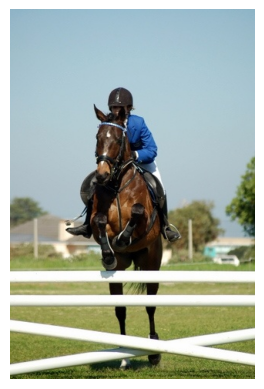

In [7]:
plt.imshow(im)
plt.axis('off')
plt.show()

##### <a id='saveimage'>Saving an Image</a>

In [8]:
# Image isntance have a method save() to save the image which will take output file name
# Image will be saved into the format given in the filename
im.save("./test_save.png")

In [9]:
# when we want to save the image in non standard format we have to give second argument to the save() method which defines the format of the image
# for example if we want to save an image in thumbnail form and using "JPEG" format here is how we need to do
with Image.open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg") as im1:
    im1.thumbnail((im.size0//4, im.size1//4))
    im1.save("test.thumbnail", "JPEG") # file name has an non-standard file format thumbnail. so second argument needs to be the format of the file

##### <a id='croppastemerge'>Crop Paste Merge</a>

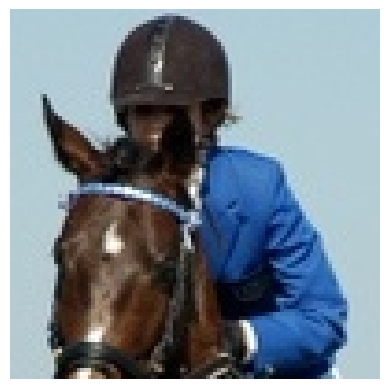

In [10]:
# Cropping an image
box = (100,100,200,200) # (start point (x1, y1) and end point (x2, y2))
im_crop = im.crop(box)
plt.imshow(im_crop)
plt.axis('off')
plt.show()

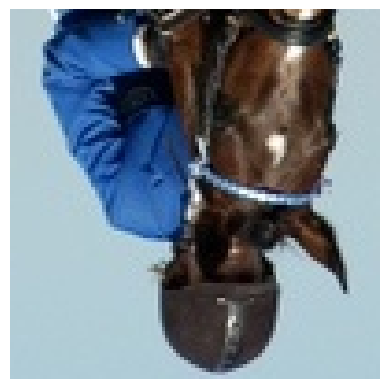

In [11]:
# Rotating an image
im_rotated = im_crop.transpose(Image.Transpose.ROTATE_180)
plt.imshow(im_rotated)
plt.axis('off')
plt.show()


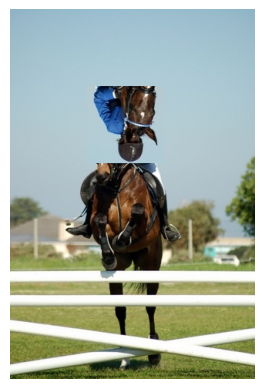

In [12]:
# pasting an image into another image
# Size of the pasted image and box should be in the boundaries of the Image1
# however format of the pasted image can be varied from original image (it can be taken care in the background)
im.paste(im_rotated, box)
plt.imshow(im)
plt.axis('off')
plt.show()

In [13]:
# For more advanced tricks, the paste method can also take a transparency mask as an optional argument. 
# In this mask, the value 255 indicates that the pasted image is opaque in that position (that is, the pasted image should be used as is). 
# The value 0 means that the pasted image is completely transparent. Values in-between indicate different levels of transparency. 
# For example, pasting an RGBA image and also using it as the mask would paste the opaque portion of the image but not its transparent background.

In [14]:
# Question: How to roll an image?
# lets assume that i want rol the image right size by 50 pixels how can we do that using paste function?

(318, 480)
50


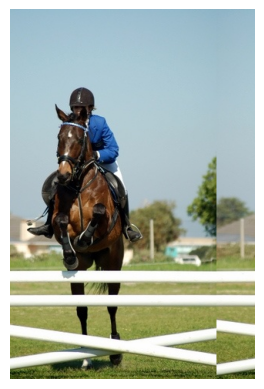

In [15]:
# double click for answer
def roll(im, delta):
    """Roll an image sideways."""
    xsize, ysize = im.size
    print(im.size)

    delta = delta % xsize
    print(delta)
    if delta == 0:
        return im

    part1 = im.crop((0, 0, delta, ysize))
    part2 = im.crop((delta, 0, xsize, ysize))
    im.paste(part1, (xsize - delta, 0, xsize, ysize))
    im.paste(part2, (0, 0, xsize - delta, ysize))

    return im
im = Image.open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg")
rolled_image = roll(im,50)
plt.imshow(rolled_image)
plt.axis('off')
plt.show()

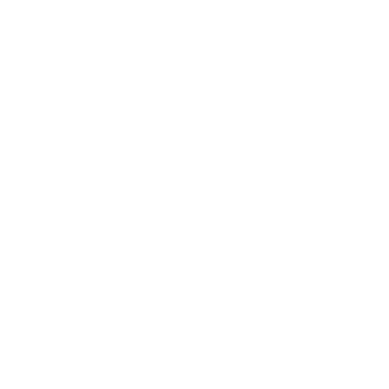

In [16]:
# create a new empty image
raw_im = Image.new("RGBA", (100,100))
plt.imshow(raw_im)
plt.axis('off')
plt.show()

In [17]:
# Question: How to merge two images to create a big image?
# I want to paste tow images side by side using Pillow how can we do it?

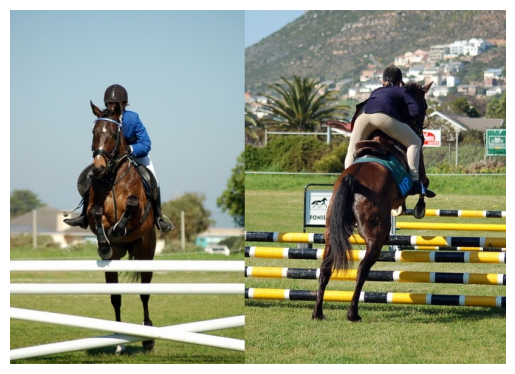

In [18]:
# double click here for answer
def merge(im1, im2):
    w = im1.size0 + im2.size0
    h = max(im1.size1, im2.size1)
    im = Image.new("RGBA", (w, h))

    im.paste(im1)
    im.paste(im2, (im1.size0, 0))

    return im

im1 = Image.open("D:/Development/Deep_Learning/datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg")
im2 = Image.open("D:/Development/Deep_Learning/datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000010.jpg")
im_merge = merge(im1,im2)
plt.imshow(im_merge)
plt.axis('off')
plt.show()

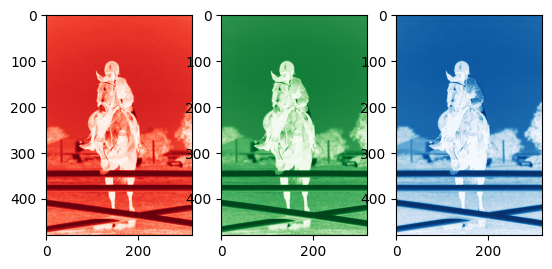

In [30]:
# Splitting the Image into bands
# Split method creates a set of new imagees, each contains one band from the original multi-band image. 
# and merge function takes the mode and a tuple of images to create a new image in that mode
im = Image.open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg")
r,g,b = im.split()
fig,ax = plt.subplots(1,3)
ax[0].imshow(r,cmap='Reds')
ax[1].imshow(g,cmap='Greens')
ax[2].imshow(b,cmap='Blues')
plt.show()

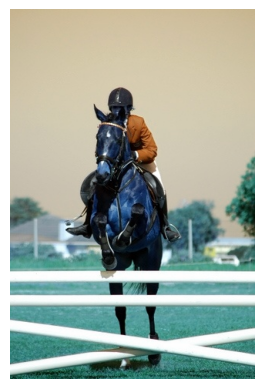

In [20]:
bgr_im = Image.merge("RGB",(b,g,r))
plt.imshow(bgr_im)
plt.axis('off')
plt.show()

#### <a id='geotransforms'>Geometrical Transforms</a>
1. resize
2. rotate
3. transpose

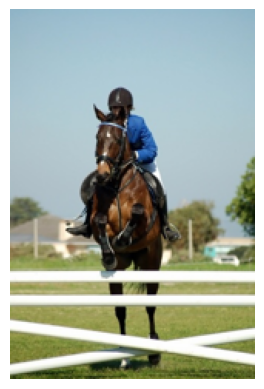

In [21]:
# Resize
im_resize = im.resize((im.size0//2, im.size1//2)) # tuple(width,height)
plt.imshow(im_resize)
plt.axis('off')
plt.show()

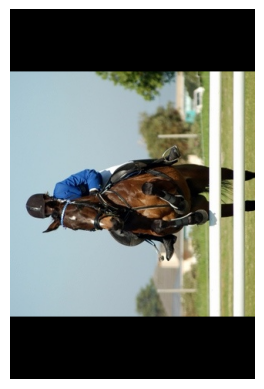

In [22]:
im_rotate = im.rotate(90) # degrees of rotation in counter-clockwise
plt.imshow(im_rotate)
plt.axis('off')
plt.show()

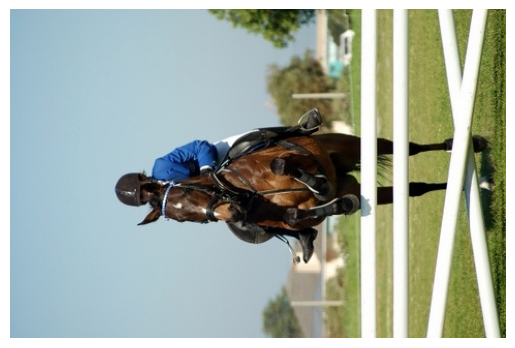

In [23]:
im_90 = im.transpose(Image.Transpose.ROTATE_90) # we can use other parameters like ROTATE_180 and ROTATE_180
plt.imshow(im_90)
plt.axis('off')
plt.show()


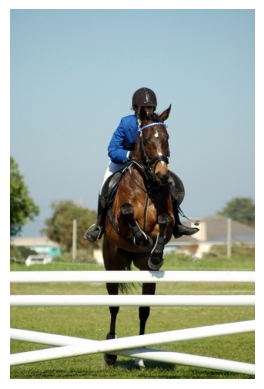

In [24]:
im_flip_hor = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
plt.imshow(im_flip_hor)
plt.axis('off')
plt.show()


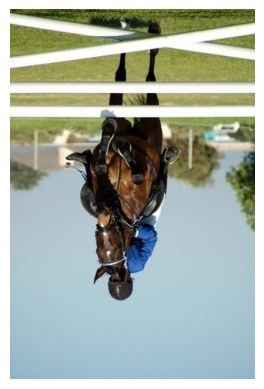

In [25]:
im_flip_vert = im.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
plt.imshow(im_flip_vert)
plt.axis('off')
plt.show()

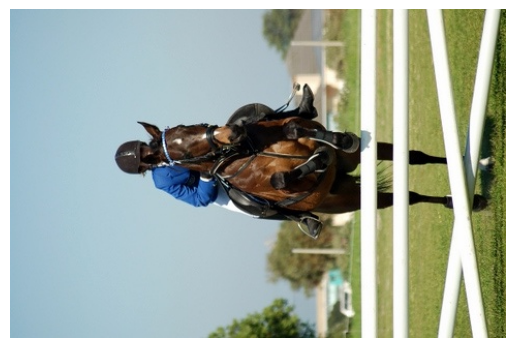

In [26]:
im_transpose = im.transpose(Image.Transpose.TRANSPOSE) # Acts like ROTATE_90 and TRANSVERSE acts like ROTATE_270
plt.imshow(im_transpose)
plt.axis('off')
plt.show()

#### <a id="colortransforms">Color Transforms</a>

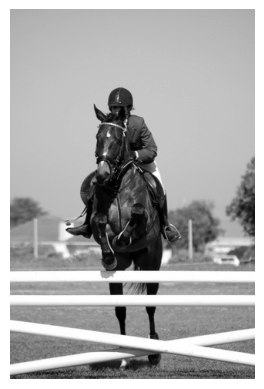

In [36]:
# Color Transforms using convert() method
with Image.open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg") as im:
    im1 = im.convert('L')  # L = R*299/1000 + G*587/1000 + B*114/1000
plt.imshow(im1, cmap='gray')
plt.axis('off')
plt.show()

### <a id='advanced'>Advanced</a>
1. [Image Filter](#filter)
2. [Point Operations](#point)
3. [Enhancement](#enhancement)
4. [Image Sequences](#imagesequences)
5. [PostScript Printing](#postscript)
6. [More on Reading Images](#readimage)

##### <a id='filter'>Image Filter</a>
Image filter module (**ImageFilter**) contains a variety of methods and enhancement filters which can be used with **filter()** method

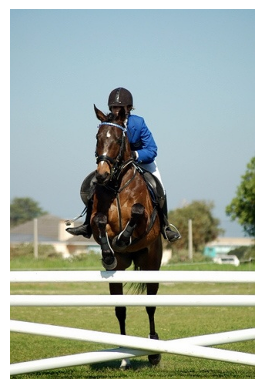

In [37]:
from PIL import ImageFilter
im_filter = im.filter(ImageFilter.DETAIL)
plt.imshow(im_filter)
plt.axis('off')
plt.show()

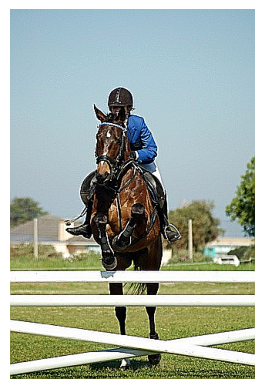

In [38]:
im_edge_enhance = im.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(im_edge_enhance)
plt.axis('off')
plt.show()

##### <a id='point'>Point Operations</a>
- The **point()** method can be used to translate the pixel values of an image (e.g. image contrast manipulation). In most cases, a function object expecting one argument can be passed to this method. Each pixel is processed according to that function provided
- Using the above technique, you can quickly apply any simple expression to an image. You can also combine the **point()** and **paste()** methods to selectively modify an image

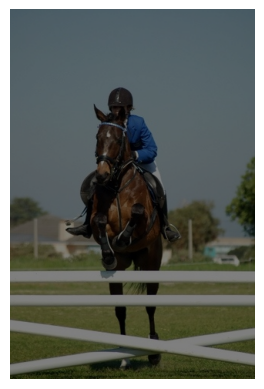

In [41]:
im_point = im.point(lambda x: x*.5)
plt.imshow(im_point)
plt.axis('off')
plt.show()

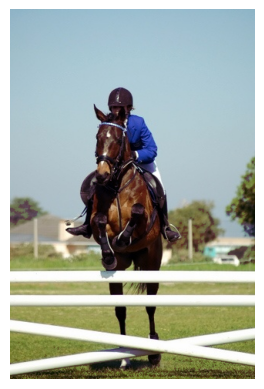

In [42]:
# Question: Create a mask using point and paste functions which can work differently on each band
source = im.split()

R, G, B = 0, 1, 2

# select regions where red is less than 100
mask = source[R].point(lambda i: i < 100 and 255)

# process the green band
out = source[G].point(lambda i: i * 0.7)

# paste the processed band back, but only where red was < 100
source[G].paste(out, None, mask)

# build a new multiband image
im_out = Image.merge(im.mode, source)


plt.imshow(im_out)
plt.axis('off')
plt.show()

##### <a id='enhancement'>Enhancement</a>

For more advanced image enhancement, you can use the classes in the **ImageEnhance** module. Once created from an image, an enhancement object can be used to quickly try out different settings.

You can adjust contrast, brightness, color balance and sharpness in this way.

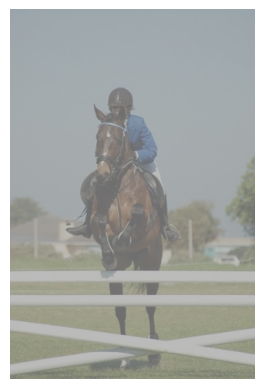

In [45]:
from PIL import ImageEnhance

enh = ImageEnhance.Contrast(im)
im_enh = enh.enhance(.3)
plt.imshow(im_enh)
plt.axis('off')
plt.show()

##### <a id='sequence'>Image Sequences</a>

- The Python Imaging Library contains some basic support for image sequences (also called animation formats). Supported sequence formats include FLI/FLC, GIF, and a few experimental formats. TIFF files can also contain more than one frame.
- When you open a sequence file, PIL automatically loads the first frame in the sequence. You can use the seek and tell methods to move between different frames:

No of frames in the sequence: 120


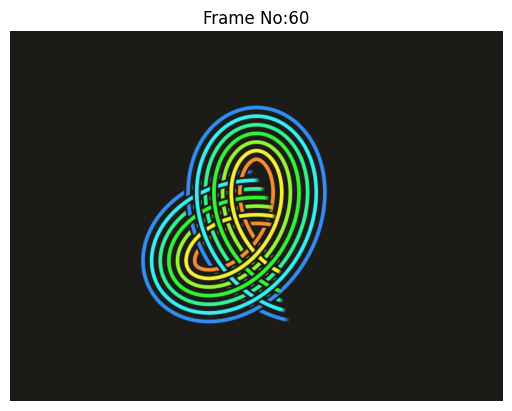

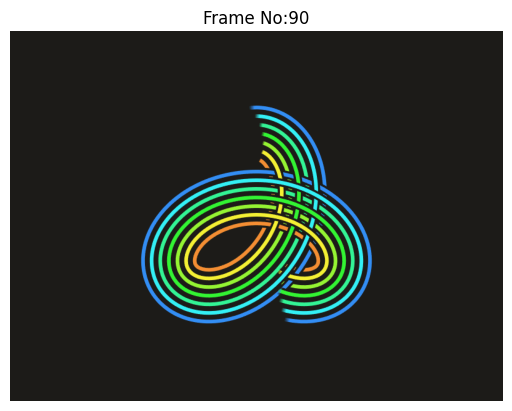

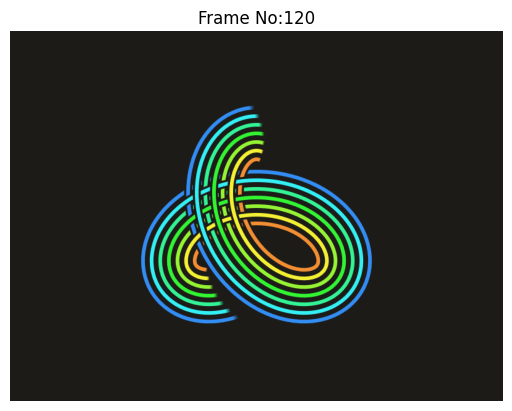

Read all the frmaes


In [53]:
with Image.open("./example-trefoil.gif") as im_gif:
    im_gif.seek(1) #skip to the second frame
    no_of_frames = im_gif.n_frames
    print(f"No of frames in the sequence: {no_of_frames}")
    skip = 30
    try:
        while no_of_frames>0:
            im_gif.seek(im_gif.tell()+skip)
            plt.imshow(im_gif)
            plt.axis('off')
            plt.title(f"Frame No:{im_gif.tell()+skip-1}")
            plt.show()
            no_of_frames -= skip
    except EOFError:
        print("Read all the frmaes")

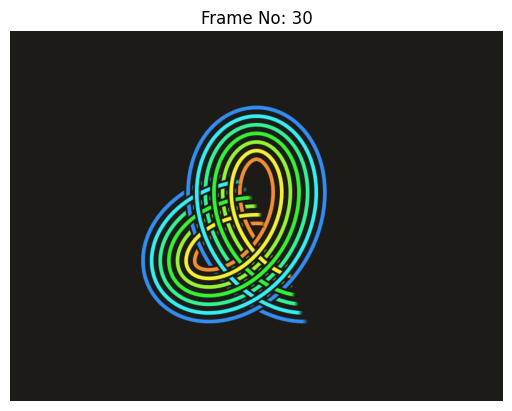

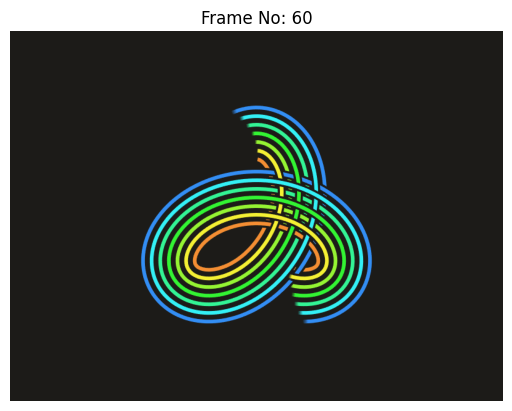

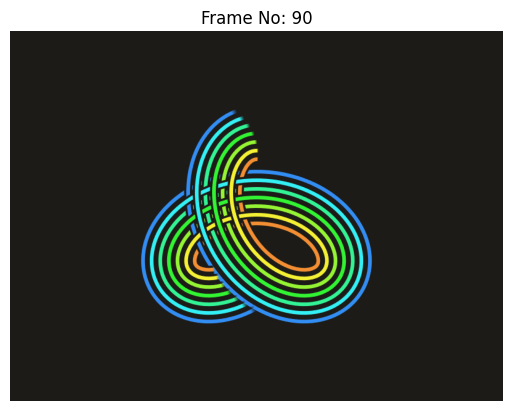

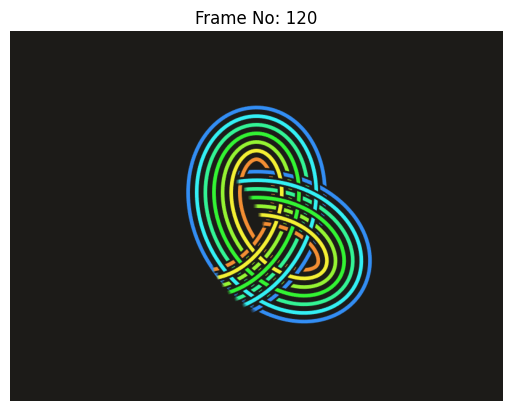

In [56]:
#Using the ImageSequence Iterator class
from PIL import ImageSequence

count = 0
im_gif = Image.open("./example-trefoil.gif")
for frame in ImageSequence.Iterator(im_gif):
    count += 1
    if count%30==0:
        plt.imshow(frame)
        plt.axis('off')
        plt.title(f"Frame No: {count}")
        plt.show()


##### <a id='postscript'>PostScript Printing</a>

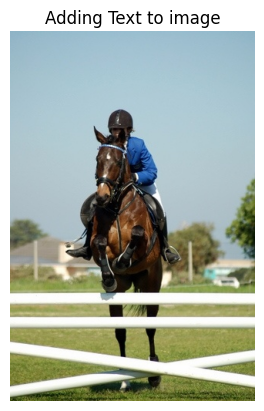

In [61]:
from PIL import PSDraw
with Image.open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg") as im:
    title = "Learning"
    box = (100,100,200,200)
    ps=PSDraw.PSDraw(open("./new_ps.ps", "wb"))
    ps.begin_document()
    ps.image(box,im,100)
    ps.rectangle(box)

    ps.setfont("HelveticaNarrow-Bold", 36)
    ps.text((150, 100), title)
    ps.end_document()

    plt.imshow(im)
    plt.axis('off')
    plt.title("Adding Text to image")
    plt.show()


##### <a id='readimage'>More on reading images</a>
- Instead of using filename we can use file-object (an image which is opened using other forms)
- But the object must implement file.read, file.seek, and file.tell methods and be opened in binary mode jsut as shown in following examples

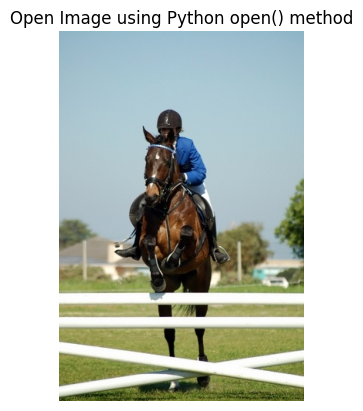

In [63]:
# Read Images using open() function
with open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg", "rb") as f:
    im = Image.open(f)
    plt.imshow(im)
    plt.axis('off')
    plt.title("Open Image using Python open() method")
    plt.show()


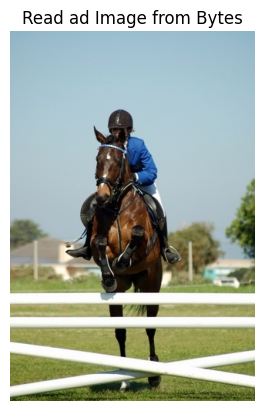

In [66]:
# Reading from bytes
import io
with open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg", "rb") as f:
    buffer = f.read()
im = Image.open(io.BytesIO(buffer))
plt.imshow(im)
plt.axis('off')
plt.title('Read ad Image from Bytes')
plt.show()

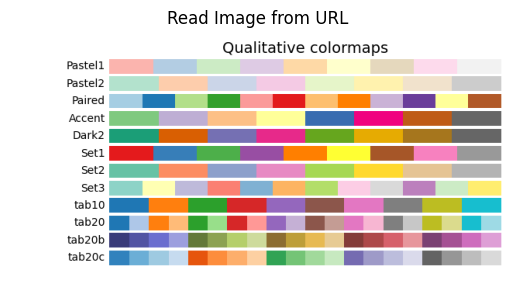

In [67]:
# Reading from URL
from urllib.request import urlopen
url = "https://matplotlib.org/stable/_images/sphx_glr_colormaps_006.png"
im_url = Image.open(urlopen(url))
plt.imshow(im_url)
plt.axis('off')
plt.title("Read Image from URL")
plt.show()

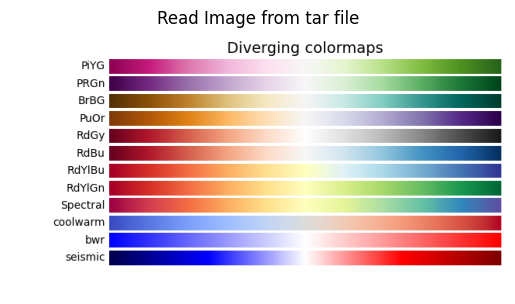

In [69]:
# Read image from TAR Archive
from PIL import TarIO
fp = TarIO.TarIO("./sphx_glr_colormaps_004.tar", "sphx_glr_colormaps_004.webp")
im_tar = Image.open(fp)
plt.imshow(im_tar)
plt.axis('off')
plt.title("Read Image from tar file")
plt.show()

Original Mode:  (318, 480) RGB
Draft Mode:  (159, 240) L


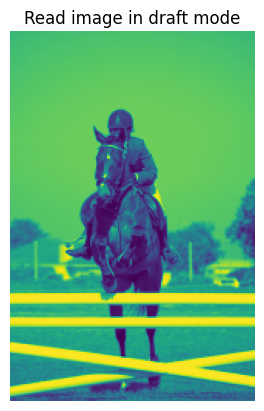

In [71]:
# Reading in draft mode
with Image.open("../../../datasets/Datasets/PascalVoc2007/PASCALVOC2007/VOCtest_06-Nov-2007/VOCdevkit/VOC2007/JPEGImages/000168.jpg") as im:
    print("Original Mode: ",im.size, im.mode)
    im.draft("L",(100,200))
    print("Draft Mode: ", im.size, im.mode)
    plt.imshow(im)
    plt.axis('off')
    plt.title("Read image in draft mode")
    plt.show()
    